<p style="text-align:center">
     <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-blank" target=""-blank"
     <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo" / >
     </a>
</p>

# Desenvolvimento de modelo

Tempo estimado necessário: **30** minutos

## Objetivos

Depois de concluir este laboratório, você será capaz de:

* Desenvolver modelos de previsão

<p>Nesta seção, desenvolveremos vários modelos que preverão o preço do carro usando as variáveis ou recursos. Esta é apenas uma estimativa, mas deve nos dar uma ideia objetiva de quanto o carro deve custar.</p>

Algumas perguntas que queremos fazer neste módulo

<ul>
     <li>Eu sei se o revendedor está oferecendo um valor justo pela minha troca?</li>
     <li>Eu sei se coloquei um valor justo no meu carro?</li>
</ul>
<p>Na análise de dados, geralmente usamos <b>Desenvolvimento de modelo</b> para nos ajudar a prever observações futuras a partir dos dados que temos.</p>

<p>Um modelo nos ajudará a entender a relação exata entre diferentes variáveis e como essas variáveis são usadas para prever o resultado.</p>


<h4>Setup</h4>


Import libraries:


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> for free storage.


In [3]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


<p>Um exemplo de modelo de dados que usaremos é:</p>
<b>Regressão linear simples</b>

<br>
<p>A Regressão Linear Simples é um método para nos ajudar a entender a relação entre duas variáveis:</p>
<ul>
     <li>O preditor/variável independente (X)</li>
     <li>A resposta/variável dependente (que queremos prever)(Y)</li>
</ul>

<p>O resultado da regressão linear é uma <b>função linear</b> que prevê a variável de resposta (dependente) como uma função da variável de previsão (independente).</p>

$$
Y: Response \ Variable\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
     <li>a refere-se ao <b>intercepto</b> da linha de regressão, ou seja: o valor de Y quando X é 0</li>
     <li>b refere-se à <b>inclinação</b> da linha de regressão, ou seja: o valor com o qual Y muda quando X aumenta em 1 unidade</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


In [4]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


Para este exemplo, queremos ver como o mpg da rodovia pode nos ajudar a prever o preço do carro.
Usando a regressão linear simples, criaremos uma função linear com "highway-mpg" como a variável preditora e o "preço" como a variável de resposta.


In [6]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:


In [7]:
lm.fit(X,Y)


LinearRegression()

We can output a prediction:


In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>What is the value of the intercept (a)?</h4>


In [9]:
lm.intercept_

38423.3058581574

<h4>What is the value of the slope inclinação (b)?</h4>


In [10]:
lm.coef_

array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>

</div>


In [11]:
# Write your code below and press Shift+Enter to execute 
lm1 = LinearRegression()
lm1

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm1 = LinearRegression()
lm1
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>

</div>


In [12]:
# Write your code below and press Shift+Enter to execute 
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm1.fit(df[['engine-size']], df[['price']])
lm1
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model.</b>

</div>


<h4>Slope</h4>


In [13]:
# Write your code below and press Shift+Enter to execute 
lm1.coef_

array([[166.86001569]])

<h4>Intercept</h4>


In [14]:
# Write your code below and press Shift+Enter to execute 
lm1.intercept_

array([-7963.33890628])

<details><summary>Click here for the solution</summary>

```python
# Slope 
lm1.coef_

# Intercept
lm1.intercept_
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>

</div>


In [15]:
# Write your code below and press Shift+Enter to execute 
Yhat=-7963.33+166.86*X
Price=-7963.34 + 166.86*engine-size

NameError: name 'engine' is not defined

<details><summary>Click here for the solution</summary>

```python
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

```

</details>


<h4>Multiple Linear Regression</h4>


<p>E se quisermos prever o preço do carro usando mais de uma variável?</p>

<p>Se quisermos usar mais variáveis em nosso modelo para prever o preço do carro, podemos usar a <b>Regressão Linear Múltipla</b>.
A regressão linear múltipla é muito semelhante à regressão linear simples, mas esse método é usado para explicar a relação entre uma variável de resposta contínua (dependente) e <b>duas ou mais</b> variáveis preditoras (independentes).
A maioria dos modelos de regressão do mundo real envolve vários preditores. Ilustraremos a estrutura usando quatro variáveis preditoras, mas esses resultados podem ser generalizados para qualquer número inteiro:</p>

$$
Y: Response \ Variable\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>Na seção anterior, sabemos que outros bons preditores de preço podem ser:</p>
<ul>
     <li>Potência</li>
     <li>Peso de meio-fio</li>
     <li>Tamanho do motor</li>
     <li>Highway-mpg</li>
</ul>
Vamos desenvolver um modelo usando essas variáveis como as variáveis preditoras.


In [16]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [17]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [18]:
lm.intercept_

-15806.62462632923

What are the values of the coefficients (b1, b2, b3, b4)?


In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Qual é o modelo linear estimado final que obtemos?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".
</div>


In [20]:
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']], df[['price']])



LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model.</b>
</div>


In [21]:
# Write your code below and press Shift+Enter to execute 
lm2.coef_


array([[   1.49789586, -820.45434016]])

<details><summary>Click here for the solution</summary>

```python
lm2.coef_

```

</details>


<h2>2. Model Evaluation Using Visualization</h2>


Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Import the visualization package, seaborn:


In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


Quando se trata de regressão linear simples, uma excelente maneira de visualizar o ajuste do nosso modelo é usar gráficos de regressão.

Este gráfico mostrará uma combinação de pontos de dados dispersos (um gráfico de dispersão), bem como a linha de regressão linear ajustada passando pelos dados. Isso nos dará uma estimativa razoável da relação entre as duas variáveis, a força da correlação, bem como a direção (correlação positiva ou negativa).


Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48155.97443594538)

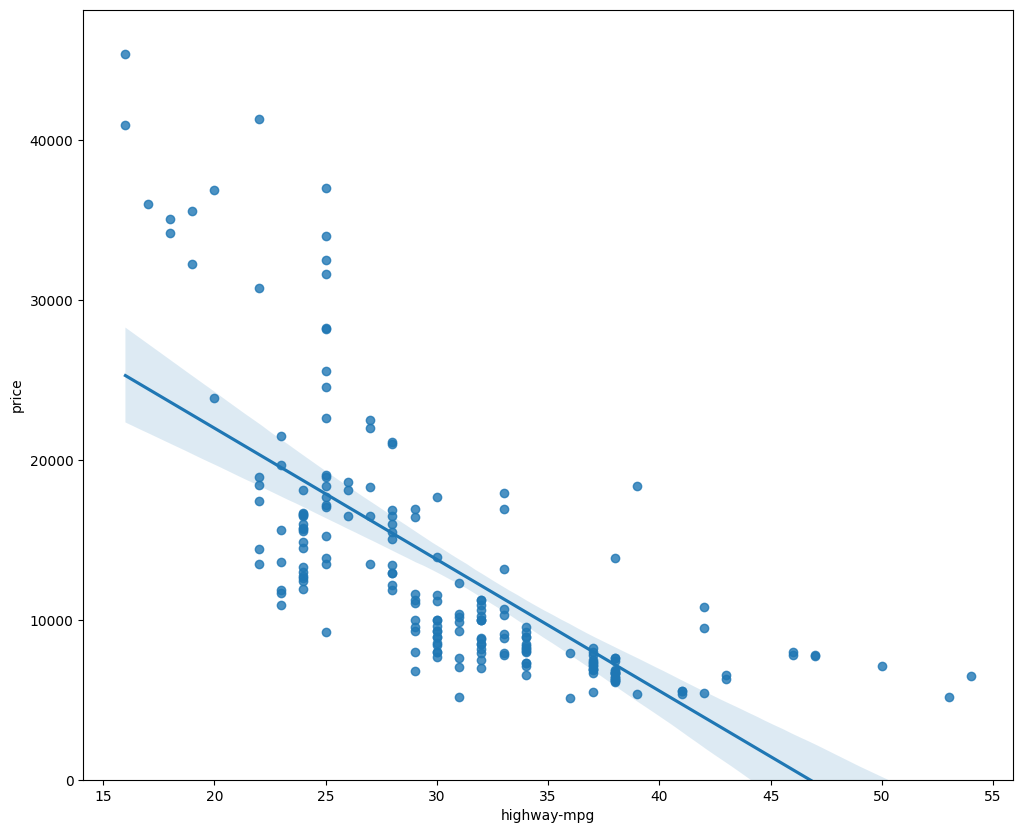

In [23]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>Podemos ver neste gráfico que o preço está negativamente correlacionado com a rodovia-mpg, pois a inclinação da regressão é negativa.

Uma coisa a ter em mente ao olhar para um gráfico de regressão é prestar atenção em como os pontos de dados estão dispersos em torno da linha de regressão. Isso lhe dará uma boa indicação da variância dos dados e se um modelo linear seria o melhor ajuste ou não. Se os dados estiverem muito distantes da linha, esse modelo linear pode não ser o melhor modelo para esses dados.

Vamos comparar este gráfico com o gráfico de regressão de "rpm de pico".</p>


(0.0, 47414.1)

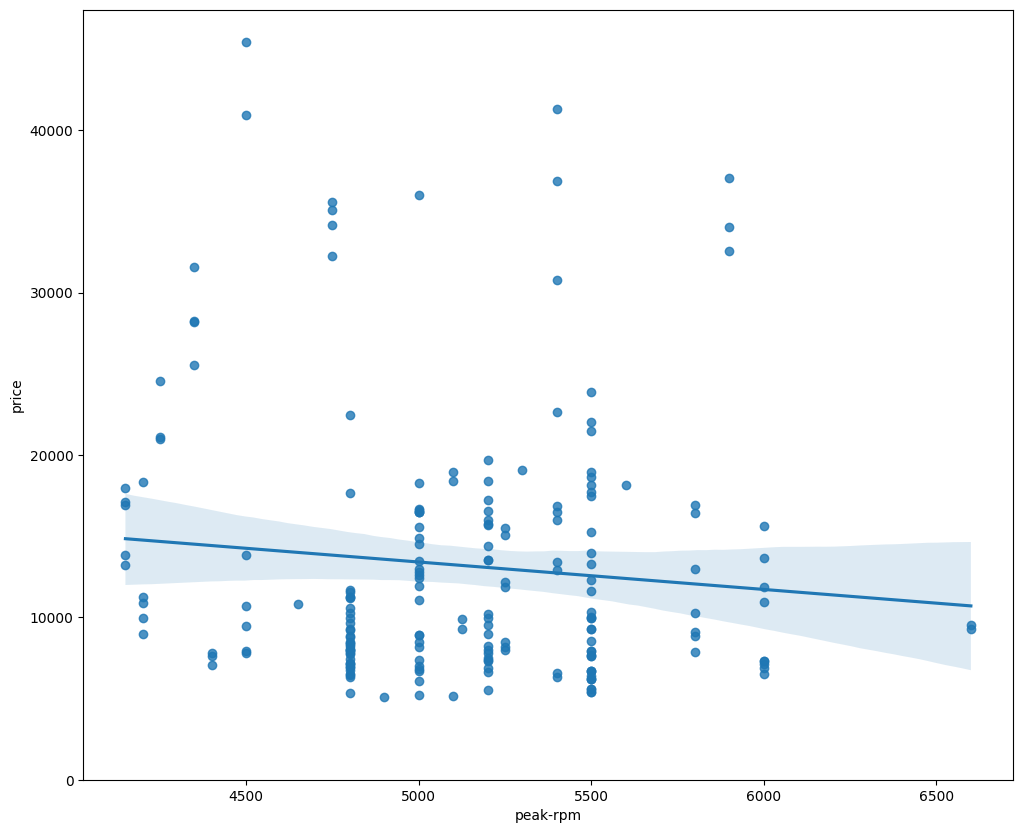

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparando o gráfico de regressão de "peak-rpm" e "highway-mpg", vemos que os pontos de "highway-mpg" estão muito mais próximos da linha gerada e, em média, diminuem. Os pontos de "rpm de pico" estão mais espalhados em torno da linha prevista e é muito mais difícil determinar se os pontos estão diminuindo ou aumentando à medida que o "rpm de pico" aumenta.</p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [25]:
# Write your code below and press Shift+Enter to execute 
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<details><summary>Click here for the solution</summary>

```python
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

```

</details>


<h3>Gráfico residual</h3>

<p>Uma boa maneira de visualizar a variância dos dados é usar um gráfico residual.</p>

<p>O que é um <b>resíduo</b>?</p>

<p>A diferença entre o valor observado (y) e o valor previsto (Yhat) é chamada de residual (e). Quando olhamos para um gráfico de regressão, o resíduo é a distância do ponto de dados até a linha de regressão ajustada.</p>

<p>Então, o que é um <b>gráfico residual</b>?</p>

<p>Um gráfico de resíduos é um gráfico que mostra os resíduos no eixo y vertical e a variável independente no eixo x horizontal.</p>

<p>No que prestamos atenção quando olhamos para uma parcela residual?</p>

<p>Nós olhamos para a propagação dos resíduos:</p>

<p>- Se os pontos em um gráfico residual são <b>distribuídos aleatoriamente em torno do eixo x</b>, então um <b>modelo linear é apropriado</b> para os dados.

Por que é que? Resíduos distribuídos aleatoriamente significam que a variância é constante e, portanto, o modelo linear é um bom ajuste para esses dados.</p>

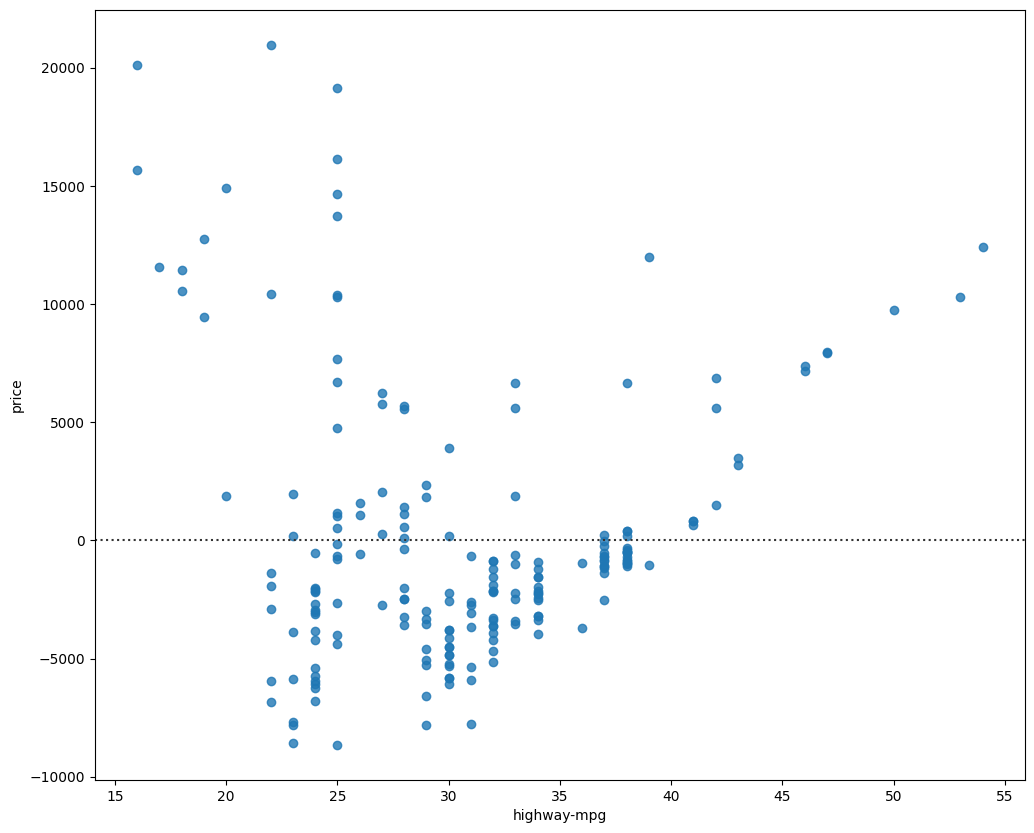

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<i>O que essa trama está nos dizendo?</i>

<p>Podemos ver a partir deste gráfico residual que os resíduos não estão espalhados aleatoriamente ao redor do eixo x, levando-nos a acreditar que talvez um modelo não linear seja mais apropriado para esses dados.</p>

<h3>Multiple Linear Regression</h3>


<p>Como visualizamos um modelo de regressão linear múltipla? Isso fica um pouco mais complicado porque você não pode visualizá-lo com regressão ou gráfico residual.</p>

<p>Uma maneira de observar o ajuste do modelo é observar o <b>gráfico de distribuição</b>. Podemos observar a distribuição dos valores ajustados resultantes do modelo e compará-la com a distribuição dos valores reais.</p>


First, let's make a prediction:


In [27]:
Y_hat = lm.predict(Z)

C:\Users\denis\AppData\Local\Temp\ipykernel_69144\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\denis\AppData\Local\Temp\ipykernel_69144\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

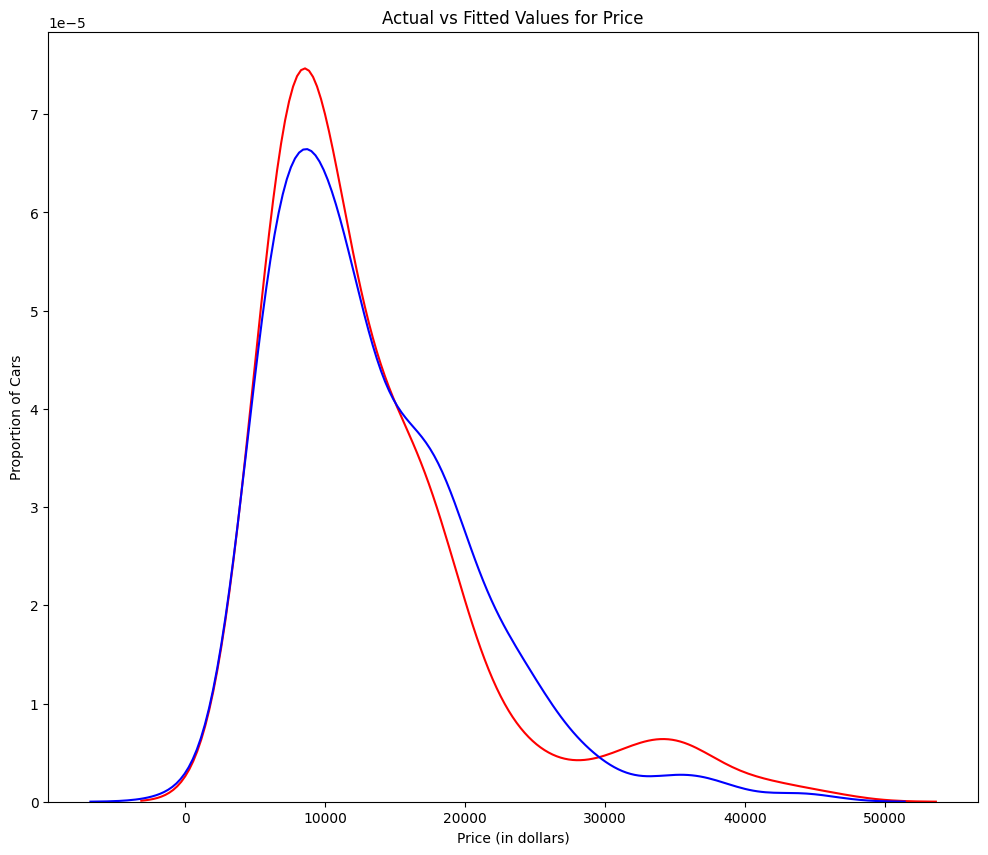

In [28]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>Podemos ver que os valores ajustados estão razoavelmente próximos dos valores reais, pois as duas distribuições se sobrepõem um pouco. No entanto, definitivamente há espaço para melhorias.</p>

<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Regressão polinomial</b> é um caso particular do modelo de regressão linear geral ou modelos de regressão linear múltipla.</p>
<p>Obtemos relacionamentos não lineares elevando ao quadrado ou definindo termos de ordem superior das variáveis de previsão.</p>

<p>Existem diferentes ordens de regressão polinomial:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>Vimos anteriormente que um modelo linear não fornecia o melhor ajuste ao usar "highway-mpg" como a variável preditora. Vamos ver se podemos tentar ajustar um modelo polinomial aos dados.</p>

<p>Usaremos a seguinte função para plotar os dados:</p>


In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:


In [30]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [31]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function:


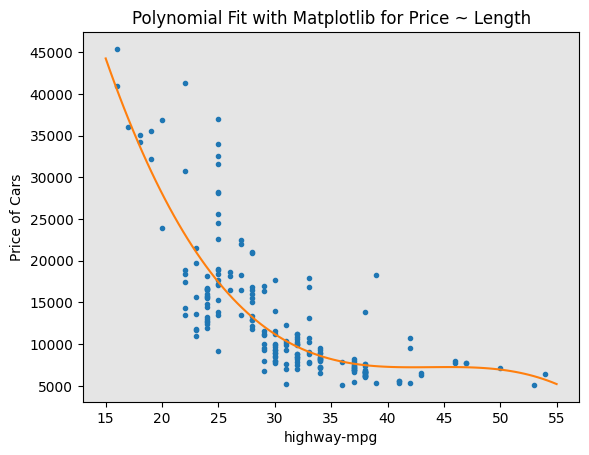

In [32]:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


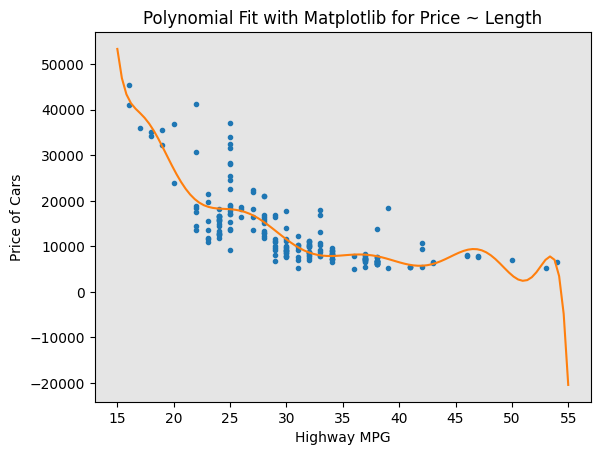

In [34]:
# Write your code below and press Shift+Enter to execute 

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<details><summary>Click here for the solution</summary>

```python
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

```

</details>


<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [35]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2:


In [36]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [37]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [38]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.


In [39]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [41]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [42]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primeiro, convertemos o tipo de dados Z no tipo float para evitar avisos de conversão que podem aparecer como resultado de StandardScaler receber entradas float.

Então, podemos normalizar os dados, realizar uma transformação e ajustar o modelo simultaneamente.


In [43]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Da mesma forma, podemos normalizar os dados, realizar uma transformação e produzir uma previsão simultaneamente.

In [44]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


In [45]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<details><summary>Click here for the solution</summary>

```python
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

```

</details>


<h2>4. Medidas para avaliação na amostra</h2>


<p>Ao avaliar nossos modelos, não queremos apenas visualizar os resultados, mas também uma medida quantitativa para determinar a precisão do modelo.</p>

<p>Duas medidas muito importantes que são frequentemente usadas em Estatística para determinar a precisão de um modelo são:</p>
<ul>
     <li><b>R^2 / R ao quadrado</b></li>
     <li><b>Erro quadrático médio (MSE)</b></li>
</ul>

<b>R ao quadrado</b>

<p>R ao quadrado, também conhecido como coeficiente de determinação, é uma medida para indicar o quão próximo os dados estão da linha de regressão ajustada.</p>

<p>O valor do R-quadrado é a porcentagem de variação da variável de resposta (y) que é explicada por um modelo linear.</p>

<b>Erro quadrático médio (MSE)</b>

<p>O Erro Quadrado Médio mede a média dos quadrados dos erros. Ou seja, a diferença entre o valor real (y) e o valor estimado (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [46]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [47]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [48]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [49]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2:


In [50]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We produce a prediction:


In [51]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [52]:
print('O erro quadrado médio do preço e valor previsto usando multifit é: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

O erro quadrado médio do preço e valor previsto usando multifit é:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2.


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


In [53]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


In [54]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


We can say that \~67.419 % of the variation of price is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:


In [55]:
mean_squared_error(df['price'], p(x))

20474146.42636122

<h2>5. Previsão e Tomada de Decisão</h2>
<h3>Previsão</h3>

<p>Na seção anterior, treinamos o modelo usando o método <b>fit</b>. Agora usaremos o método <b>predict</b> para produzir uma previsão. Permite importar <b>pyplot</b> para plotagem; também usaremos algumas funções do numpy.</p>


In [56]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [57]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:


In [58]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [59]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\denis\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

We can plot the data:


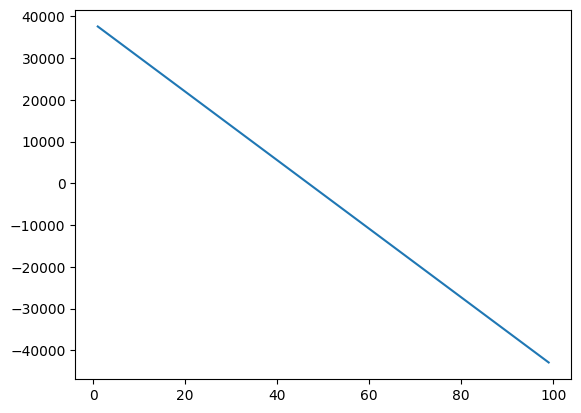

In [60]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Agora que visualizamos os diferentes modelos e geramos os valores R-quadrado e MSE para os ajustes, como determinamos um bom ajuste de modelo?
<ul>
     <li><i>O que é um bom valor de R ao quadrado?</i></li>
</ul>
</p>

<p>Ao comparar modelos, <b>o modelo com o maior valor de R ao quadrado é o mais adequado</b> para os dados.
<ul>
     <li><i>O que é um bom MSE?</i></li>
</ul>
</p>

<p>Ao comparar modelos, <b>o modelo com o menor valor MSE é o mais adequado</b> para os dados.</p>

<h4>Vamos dar uma olhada nos valores para os diferentes modelos.</h4>
<p>Regressão Linear Simples: Usando Highway-mpg como uma Variável Preditora de Preço.
<ul>
     <li>R ao quadrado: 0,49659118843391759</li>
     <li>MSE: 3,16 x10^7</li>
</ul>
</p>

<p>Regressão Linear Múltipla: Usando Potência, Peso-meio-fio, Tamanho do Motor e Rodovia-mpg como Variáveis Preditoras de Preço.
<ul>
     <li>R ao quadrado: 0,80896354913783497</li>
     <li>MSE: 1,2 x10^7</li>
</ul>
</p>

<p>Ajuste Polinomial: Usando Highway-mpg como uma Variável Preditora de Preço.
<ul>
     <li>R ao quadrado: 0,6741946663906514</li>
     <li>MSE: 2,05 x 10^7</li>
</ul>
</p>

<h3>Modelo de Regressão Linear Simples (SLR) vs Modelo de Regressão Linear Múltipla (MLR)</h3>

<p>Normalmente, quanto mais variáveis você tiver, melhor será a previsão do seu modelo, mas isso nem sempre é verdade. Às vezes, você pode não ter dados suficientes, pode se deparar com problemas numéricos ou muitas das variáveis podem não ser úteis e até mesmo agir como ruído. Como resultado, você deve sempre verificar o MSE e o R^2.</p>

<p>Para comparar os resultados dos modelos MLR x SLR, analisamos uma combinação de R-quadrado e MSE para tirar a melhor conclusão sobre o ajuste do modelo.
<ul>
     <li><b>MSE</b>: O MSE do SLR é 3,16x10^7, enquanto o MLR tem um MSE de 1,2 x10^7. O MSE de MLR é muito menor.</li>
     <li><b>R ao quadrado</b>: Neste caso, também podemos ver que há uma grande diferença entre o R ao quadrado do SLR e o R ao quadrado do MLR. O R-quadrado para o SLR (~0,497) é muito pequeno em comparação com o R-quadrado para o MLR (~0,809).</li>
</ul>
</p>

Este R-quadrado em combinação com o MSE mostra que o MLR parece ser o modelo mais adequado neste caso em comparação com o SLR.

<b>R^2 Quanto mais próximo de 1 melhor, o MSE quanto menor o valor melhor!</b>

<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
     <li><b>MSE</b>: Podemos ver que o ajuste polinomial derrubou o MSE, já que este MSE é menor que o do SLR.</li>
     <li><b>R-quadrado</b>: o R-quadrado para o ajuste polinomial é maior do que o R-quadrado para o SLR, então o ajuste polinomial também trouxe o R-quadrado bastante.</ li>
</ul>
<p><b>Uma vez que o ajuste polinomial resultou em um MSE mais baixo e um R-quadrado mais alto, podemos concluir que este foi um modelo de ajuste melhor do que a regressão linear simples para prever "preço" com "rodovia-mpg" como uma variável preditora.</b> </p>

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
     <li><b>MSE</b>: o MSE para o MLR é menor que o MSE para o ajuste polinomial.</li>
     <li><b>R ao quadrado</b>: o R ao quadrado para o MLR também é muito maior do que para o ajuste polinomial.</li>
</ul>

<h2>Conclusion</h2>


<p>Comparando esses três modelos, concluímos que <b>o modelo MLR é o melhor modelo</b> para prever o preço de nosso conjunto de dados. Esse resultado faz sentido, pois temos 27 variáveis no total e sabemos que mais de uma dessas variáveis são possíveis preditores do preço final do carro.</p>

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                            |
| ----------------- | ------- | ---------- | --------------------------------------------- |
| 2020-10-30        | 2.2     | Lakshmi    | Changed url of csv                            |
| 2020-09-09        | 2.1     | Lakshmi    | Fixes made in Polynomial Regression Equations |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
